In [268]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [358]:
data = pd.read_csv('数据集/train_data.csv')
test_data = pd.read_csv('数据集/test_a.csv')

In [359]:
data

,ID,area,rentType,houseType,houseFloor,totalFloor,houseToward,houseDecoration,communityName,city,...,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeTime,tradeMoney
0,100309852,68.06,未知方式,2室1厅1卫,低,16,暂无数据,其他,XQ00051,SH,...,0,0.0000,28248,614,111546,1124.0,284.0,0,2018/11/28,2000.0
1,100307942,125.55,未知方式,3室2厅2卫,中,14,暂无数据,简装,XQ00130,SH,...,0,0.0000,14823,148,157552,701.0,22.0,1,2018/12/16,2000.0
2,100307764,132.00,未知方式,3室2厅2卫,低,32,暂无数据,其他,XQ00179,SH,...,0,0.0000,77645,520,131744,57.0,20.0,1,2018/12/22,16000.0
3,100306518,57.00,未知方式,1室1厅1卫,中,17,暂无数据,精装,XQ00313,SH,...,332760000,3080.0331,8750,1665,253337,888.0,279.0,9,2018/12/21,1600.0
4,100305262,129.00,未知方式,3室2厅3卫,低,2,暂无数据,毛坯,XQ01257,SH,...,0,0.0000,800,117,125309,2038.0,480.0,0,2018/11/18,2900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41435,100000438,10.00,合租,4室1厅1卫,高,11,北,精装,XQ01209,SH,...,573070000,4313.0100,20904,0,245872,29635.0,2662.0,0,2018/2/5,2190.0
41436,100000201,7.10,合租,3室1厅1卫,中,6,北,精装,XQ00853,SH,...,0,0.0000,4370,0,306857,28213.0,2446.0,0,2018/1/22,2090.0
41437,100000198,9.20,合租,4室1厅1卫,高,18,北,精装,XQ00852,SH,...,0,0.0000,4370,0,306857,19231.0,2016.0,0,2018/2/8,3190.0
41438,100000182,14.10,合租,4室1厅1卫,低,8,北,精装,XQ00791,SH,...,0,0.0000,4370,0,306857,17471.0,2554.0,0,2018/3/22,2460.0


## 数据总览和分布情况

In [360]:
print(data.info())
data.describe(percentiles = [0.25,0.5,0.75,0.8,0.85,0.9,0.95])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41440 entries, 0 to 41439
Data columns (total 51 columns):
ID                    41440 non-null int64
area                  41440 non-null float64
rentType              41440 non-null object
houseType             41440 non-null object
houseFloor            41440 non-null object
totalFloor            41440 non-null int64
houseToward           41440 non-null object
houseDecoration       41440 non-null object
communityName         41440 non-null object
city                  41440 non-null object
region                41440 non-null object
plate                 41440 non-null object
buildYear             41440 non-null object
saleSecHouseNum       41440 non-null int64
subwayStationNum      41440 non-null int64
busStationNum         41440 non-null int64
interSchoolNum        41440 non-null int64
schoolNum             41440 non-null int64
privateSchoolNum      41440 non-null int64
hospitalNum           41440 non-null int64
drugStoreNum       

,ID,area,totalFloor,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum,tradeMoney
count,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,41440.000000,...,41440.000000,4.144000e+04,41440.000000,41440.000000,41440.000000,41440.000000,41422.000000,41422.000000,41440.000000,4.144000e+04
mean,1.001221e+08,70.959409,11.413152,1.338538,5.741192,187.197153,1.506395,48.228813,6.271911,4.308736,...,12621.406425,1.045363e+08,724.763918,77250.235497,1137.132095,294514.059459,26945.663512,3089.077085,0.396260,8.837074e+03
std,9.376566e+04,88.119569,7.375203,3.180349,4.604929,179.674625,1.687631,29.568448,4.946457,3.359714,...,49853.120341,5.215216e+08,3224.303831,132052.508523,7667.381627,196745.147181,32174.637924,2954.706517,1.653932,5.514287e+05
min,1.000000e+08,1.000000,0.000000,0.000000,0.000000,24.000000,0.000000,9.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,600.000000,0.000000,49330.000000,17.000000,6.000000,0.000000,0.000000e+00
25%,1.000470e+08,42.607500,6.000000,0.000000,2.000000,74.000000,0.000000,24.000000,2.000000,1.000000,...,0.000000,0.000000e+00,0.000000,13983.000000,0.000000,165293.000000,7928.000000,1053.000000,0.000000,2.800000e+03
50%,1.000960e+08,65.000000,7.000000,0.000000,5.000000,128.000000,1.000000,47.000000,5.000000,4.000000,...,0.000000,0.000000e+00,0.000000,38947.000000,0.000000,245872.000000,20196.000000,2375.000000,0.000000,4.000000e+03
75%,1.001902e+08,90.000000,16.000000,1.000000,7.000000,258.000000,3.000000,61.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,76668.000000,0.000000,330610.000000,34485.000000,4233.000000,0.000000,5.500000e+03
80%,1.002153e+08,94.894000,18.000000,2.000000,7.000000,276.000000,3.000000,64.000000,9.000000,6.000000,...,0.000000,0.000000e+00,0.000000,77645.000000,0.000000,371900.000000,41838.000000,4868.000000,0.000000,6.000000e+03
85%,1.002469e+08,102.941500,18.000000,3.000000,11.000000,331.000000,3.000000,71.000000,12.000000,8.000000,...,0.000000,0.000000e+00,0.000000,120140.000000,201.000000,428071.000000,48036.000000,5474.000000,0.000000,6.800000e+03
90%,1.002889e+08,119.262000,21.000000,5.000000,13.000000,441.000000,4.000000,98.000000,13.000000,9.000000,...,0.000000,0.000000e+00,0.000000,166244.000000,783.000000,589930.000000,56489.000000,6647.000000,1.000000,8.100000e+03


## 2. 缺失值情况

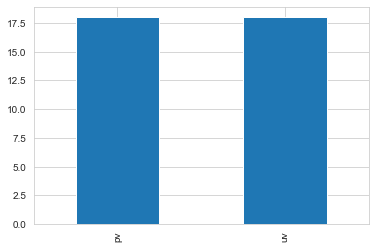

In [361]:
# 画出缺失值
sns.set_style("whitegrid")
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

### 缺失处理
提取出ID和tradeMoney 另外储存， 用平均年份取代buildYear中的'暂无信息'

In [362]:
# data.isnull().any()  # 缺失值存在在pv和uv中，填充为0
data = data.fillna(value = 0)
# 求出平均年份
a = data.loc[data['buildYear'] != '暂无信息','buildYear']
avg = int(a.astype('int').mean())
# 替换 buildYear中的中文  (用平均年份)
data.loc[data['buildYear'] == '暂无信息','buildYear'] = str(avg)
data.buildYear = data['buildYear'].astype('int')



### 分布

第一行为 buildYear和tradeMoney的关系 具体的修建时间集中在3个年份  
第二行为 tradeMoney分布 有点类似于正态分布的右偏版本

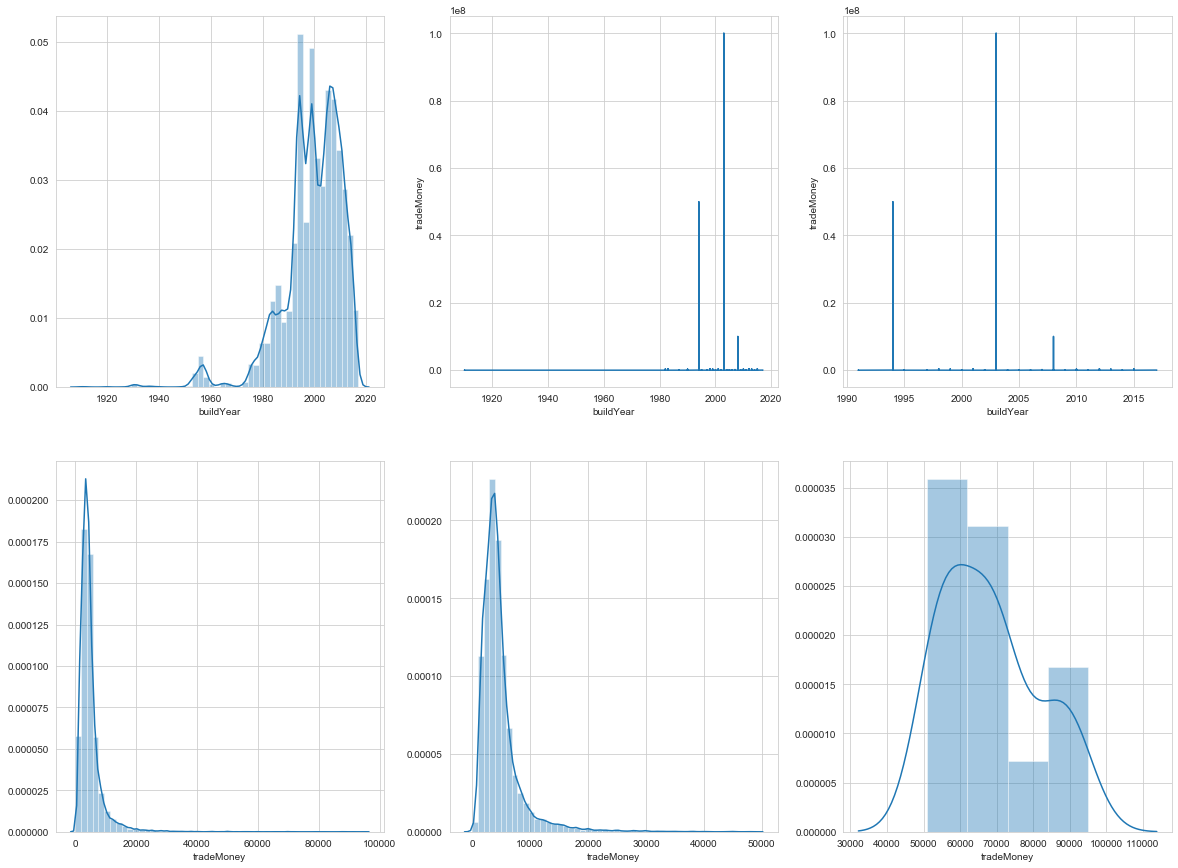

In [363]:
with_time_dist = data.sort_values('buildYear',inplace=False)
fig,axes = plt.subplots(2,3,figsize=(50,5))
fig.set_size_inches(20,15)
sns.distplot(with_time_dist['buildYear'],ax=axes[0][0])
sns.distplot(with_time_dist[with_time_dist['tradeMoney']<100000]['tradeMoney'],ax=axes[1][0])
sns.distplot(with_time_dist[with_time_dist['tradeMoney']<50000]['tradeMoney'],ax=axes[1][1])
sns.distplot(with_time_dist[(with_time_dist['tradeMoney']>50000) & (with_time_dist['tradeMoney']<100000)]['tradeMoney'],ax=axes[1][2])

plt.subplot(2,3,2)
plt.ylabel('tradeMoney')
plt.xlabel('buildYear')
plt.plot(with_time_dist['buildYear'],with_time_dist['tradeMoney'])
plt.subplot(2,3,3)
plt.ylabel('tradeMoney')
plt.xlabel('buildYear')
plt.plot(with_time_dist[with_time_dist['buildYear']>1990]['buildYear'],with_time_dist[with_time_dist['buildYear']>1990]['tradeMoney'])
plt.show()



In [364]:
# 分出ID 和 label(交易金额)
ID = data.loc[:,'ID']
data = data.drop('ID',axis=1)
tradeMoney = data.loc[:,'tradeMoney']
data = data.drop('tradeMoney',axis=1)

In [365]:
# 中文字---> object 
non_feas = [f for f in data.columns if data.dtypes[f] == 'object']
is_feas = [f for f in data.columns if data.dtypes[f] != 'object']
non_feas # 非数值型数据

['rentType',
 'houseType',
 'houseFloor',
 'houseToward',
 'houseDecoration',
 'communityName',
 'city',
 'region',
 'plate',
 'tradeTime']

## 数据处理

nunique处理


rentType 分布
未知方式    30759
整租       5472
合租       5204
--          5
Name: rentType, dtype: int64


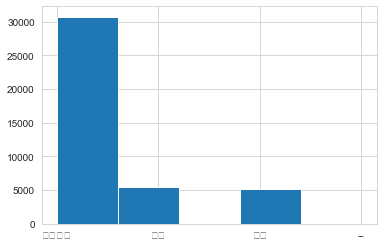

houseType 分布
1室1厅1卫    9805
2室1厅1卫    8512
2室2厅1卫    6783
3室1厅1卫    3992
3室2厅2卫    2737
          ... 
6室4厅4卫       1
9室2厅5卫       1
5室1厅5卫       1
3室4厅4卫       1
7室1厅3卫       1
Name: houseType, Length: 104, dtype: int64


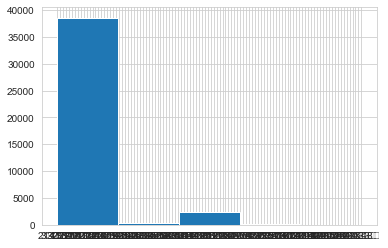

houseFloor 分布
中    15458
高    14066
低    11916
Name: houseFloor, dtype: int64


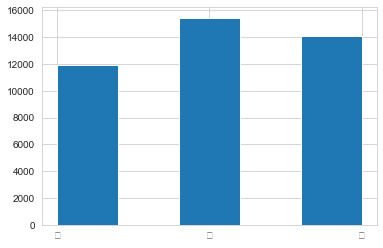

houseToward 分布
南       34377
南北       2254
北        2043
暂无数据      963
东南        655
东         552
西         264
西南        250
西北         58
东西         24
Name: houseToward, dtype: int64


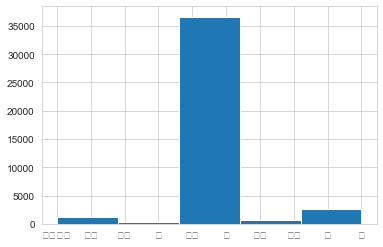

houseDecoration 分布
其他    29040
精装    10918
简装     1171
毛坯      311
Name: houseDecoration, dtype: int64


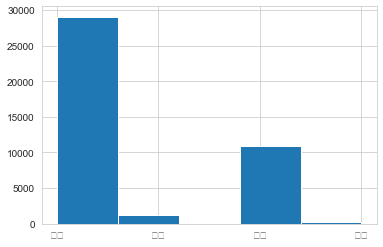

communityName 分布
XQ01834    358
XQ01274    192
XQ02273    188
XQ03110    185
XQ02337    173
          ... 
XQ00797      1
XQ01802      1
XQ01430      1
XQ00731      1
XQ00555      1
Name: communityName, Length: 4236, dtype: int64
city 分布
SH    41440
Name: city, dtype: int64


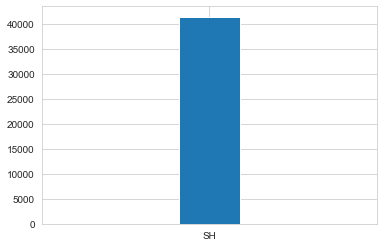

region 分布
RG00002    11437
RG00005     5739
RG00003     4186
RG00010     3640
RG00012     3368
RG00004     3333
RG00006     1961
RG00007     1610
RG00008     1250
RG00013     1215
RG00001     1157
RG00014     1069
RG00011      793
RG00009      681
RG00015        1
Name: region, dtype: int64


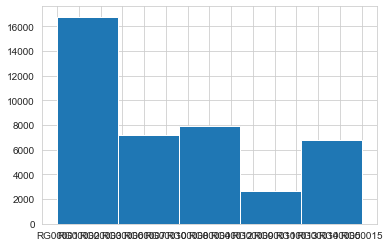

plate 分布
BK00031    1958
BK00033    1837
BK00045    1816
BK00055    1566
BK00056    1516
           ... 
BK00016      40
BK00036      33
BK00058      15
BK00032       3
BK00001       1
Name: plate, Length: 66, dtype: int64


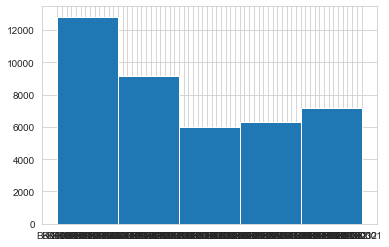

tradeTime 分布
2018/3/3     543
2018/3/4     487
2018/3/11    410
2018/3/10    400
2018/3/24    341
            ... 
2018/1/2       5
2018/2/13      4
2018/2/20      2
2018/2/19      1
2018/2/17      1
Name: tradeTime, Length: 361, dtype: int64


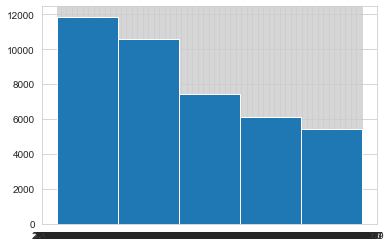

In [366]:
for x in non_feas:
    print(x+' 分布')
    print(data[x].value_counts())
    if x != 'communityName':
        plt.hist(data[x],bins=5)
        plt.show()

箱型图处理

In [392]:
scaler = MinMaxScaler()
drawData = scaler.fit_transform(data.loc[:,is_feas])
y1 = is_feas[0:(len(is_feas)//2)]
y2 = is_feas[(len(is_feas)//2):]
data1 = drawData[:,:(len(is_feas)//2)]
data2 = drawData[:,(len(is_feas)//2):]
# data1

In [394]:
data1 = pd.DataFrame(data1,columns = y1)
data2 = pd.DataFrame(data2,columns = y2)


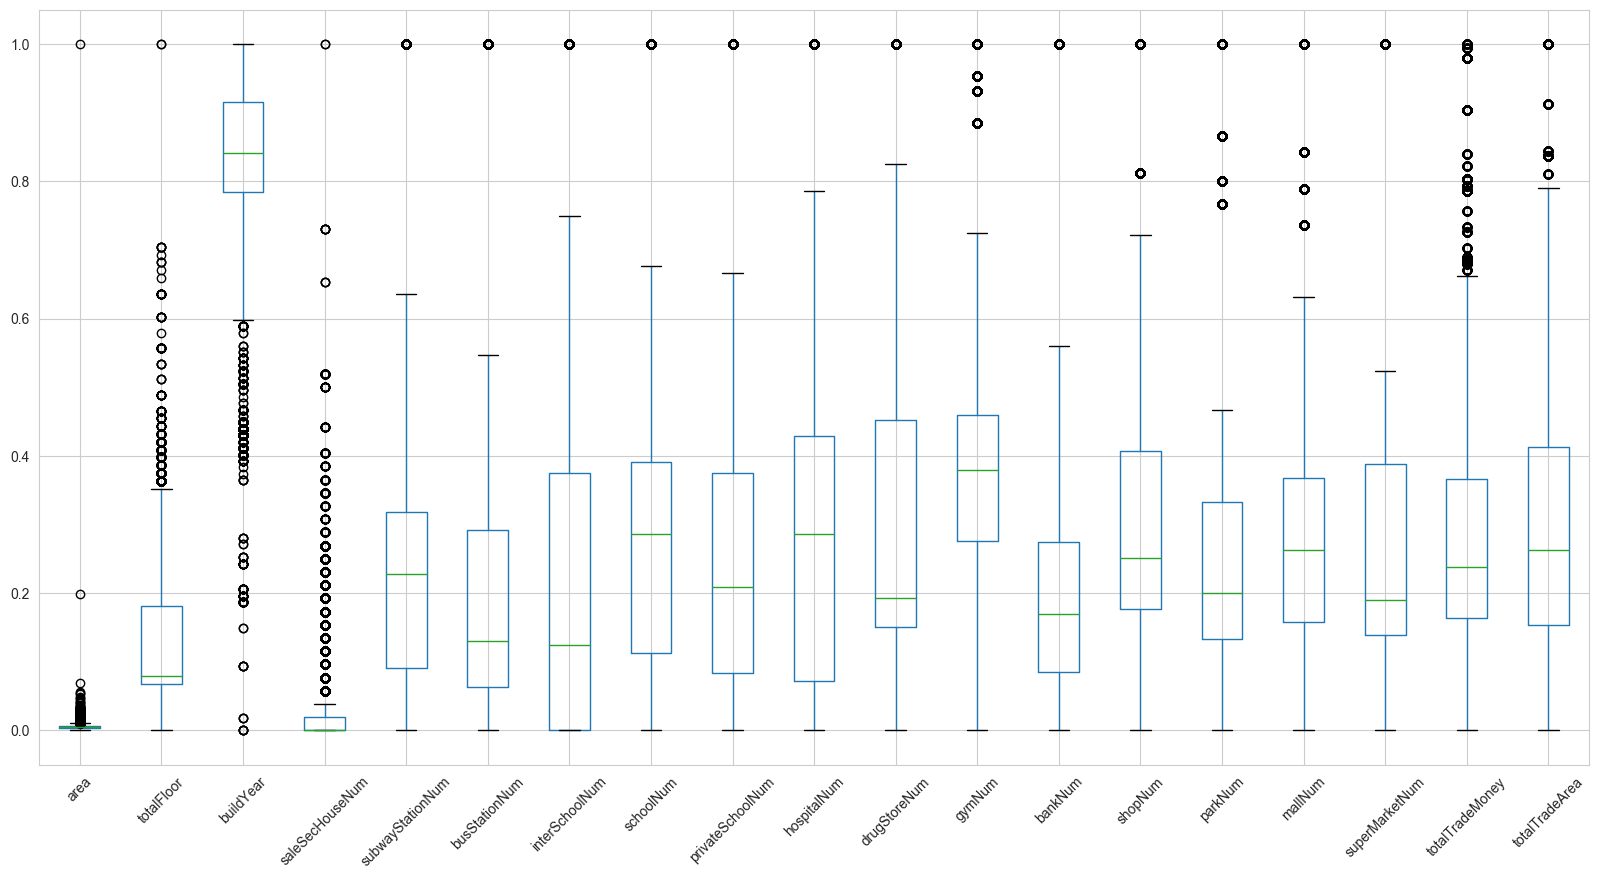

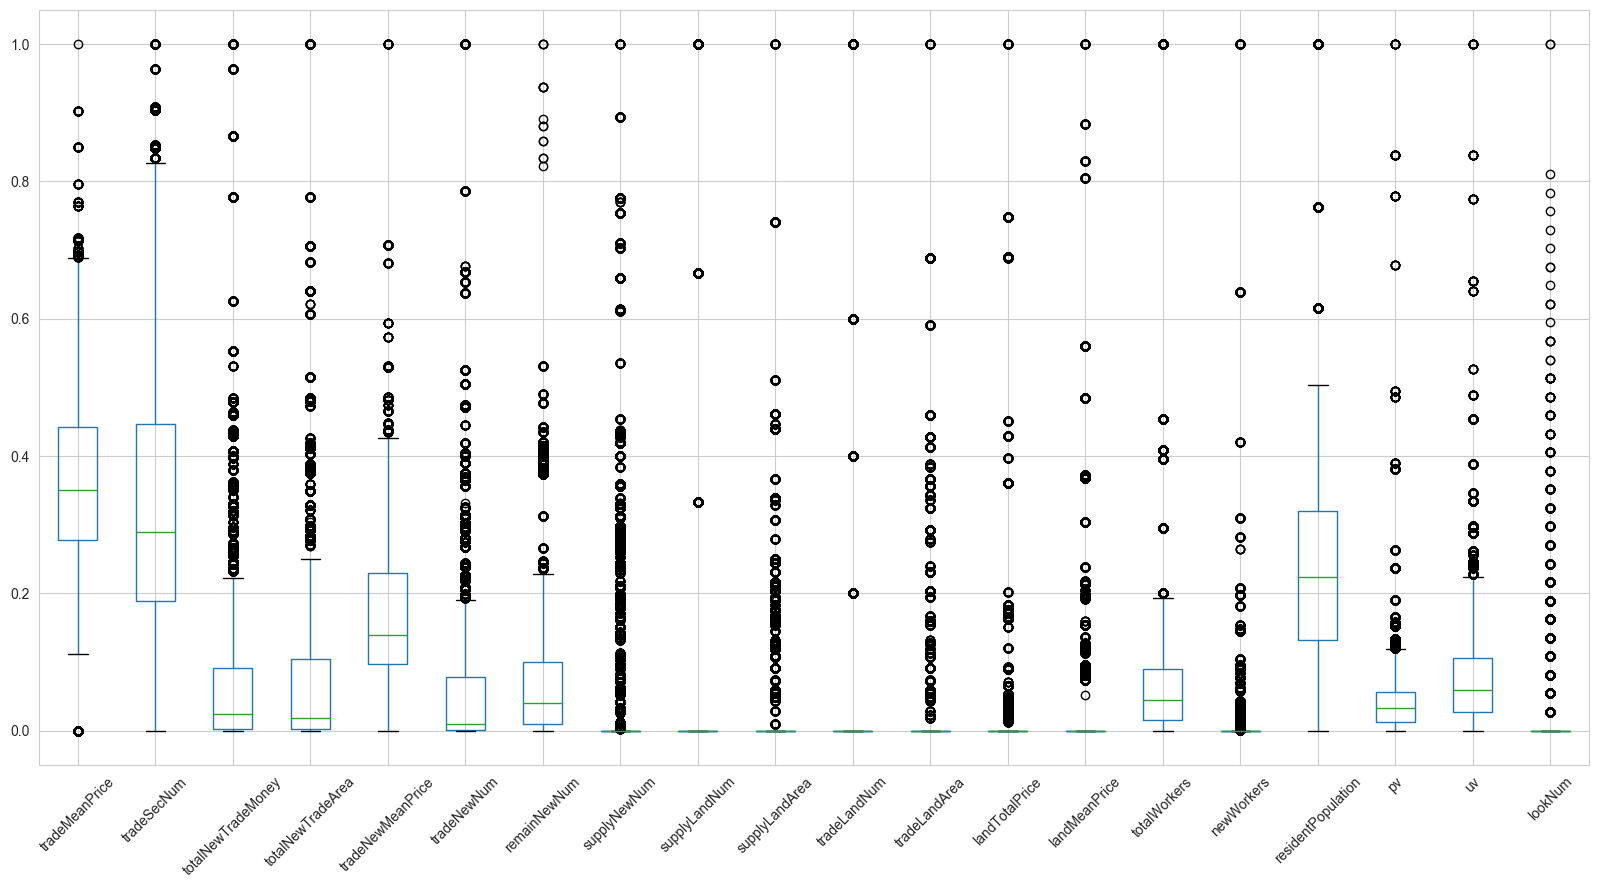

In [410]:

plt.figure(figsize=(20,10),dpi=100)
data1.boxplot()
plt.xticks(rotation=45)
plt.figure(figsize=(20,10),dpi=100)
data2.boxplot()
plt.xticks(rotation=45)
plt.show()

### 相关系数


In [415]:
drawData = pd.DataFrame(drawData,columns = (y1+y2))

In [417]:
drawData.corr()

,area,totalFloor,buildYear,saleSecHouseNum,subwayStationNum,busStationNum,interSchoolNum,schoolNum,privateSchoolNum,hospitalNum,...,tradeLandNum,tradeLandArea,landTotalPrice,landMeanPrice,totalWorkers,newWorkers,residentPopulation,pv,uv,lookNum
area,1.000000,0.082746,0.137003,0.023909,-0.010355,0.033382,0.032986,-0.012624,-0.015293,-0.012392,...,0.016917,0.016209,0.019631,0.013511,0.004930,0.022223,0.001592,0.012238,0.034465,0.009286
totalFloor,0.082746,1.000000,0.411262,0.010170,0.006422,0.053091,-0.051045,-0.020157,-0.059855,0.035029,...,-0.000712,-0.004290,-0.017954,-0.017011,0.178294,0.029101,0.022682,0.097801,0.069953,-0.000028
buildYear,0.137003,0.411262,1.000000,-0.000750,0.093898,0.224869,-0.032897,-0.062251,-0.120929,0.005581,...,0.082260,0.086552,0.060543,0.061056,-0.098381,-0.008514,0.177986,0.135995,0.168992,-0.012249
saleSecHouseNum,0.023909,0.010170,-0.000750,1.000000,-0.026399,0.031629,-0.007285,-0.017954,0.032270,-0.012456,...,0.062807,0.065817,0.083181,0.096914,-0.041772,0.076490,0.017066,-0.140033,-0.097894,0.177540
subwayStationNum,-0.010355,0.006422,0.093898,-0.026399,1.000000,0.252314,-0.026975,0.643900,0.188826,0.573360,...,-0.008159,-0.017522,-0.003857,0.009712,0.212760,0.154487,0.549301,0.234083,0.319532,-0.002066
busStationNum,0.033382,0.053091,0.224869,0.031629,0.252314,1.000000,0.297939,0.558335,0.047329,0.613182,...,0.348831,0.334577,0.137075,0.138972,-0.057569,0.016074,0.845071,0.406132,0.390180,0.005901
interSchoolNum,0.032986,-0.051045,-0.032897,-0.007285,-0.026975,0.297939,1.000000,0.133932,0.139548,0.181332,...,0.136126,0.121680,0.093815,0.125085,0.040155,0.032677,0.153226,0.038850,0.017400,-0.000074
schoolNum,-0.012624,-0.020157,-0.062251,-0.017954,0.643900,0.558335,0.133932,1.000000,0.443438,0.775448,...,0.126738,0.116114,0.022003,0.041300,0.202449,0.167598,0.780225,0.254587,0.298950,0.007413
privateSchoolNum,-0.015293,-0.059855,-0.120929,0.032270,0.188826,0.047329,0.139548,0.443438,1.000000,0.097900,...,-0.006370,-0.011380,-0.044983,-0.011327,0.227847,0.094423,0.300599,0.096813,0.145855,0.014583
hospitalNum,-0.012392,0.035029,0.005581,-0.012456,0.573360,0.613182,0.181332,0.775448,0.097900,1.000000,...,0.178741,0.149749,0.039733,0.069129,-0.045273,0.085045,0.754047,0.303628,0.304005,-0.007191


属性过多，热力图不好看，可以进行通过上面的图表先进行第一步筛选.

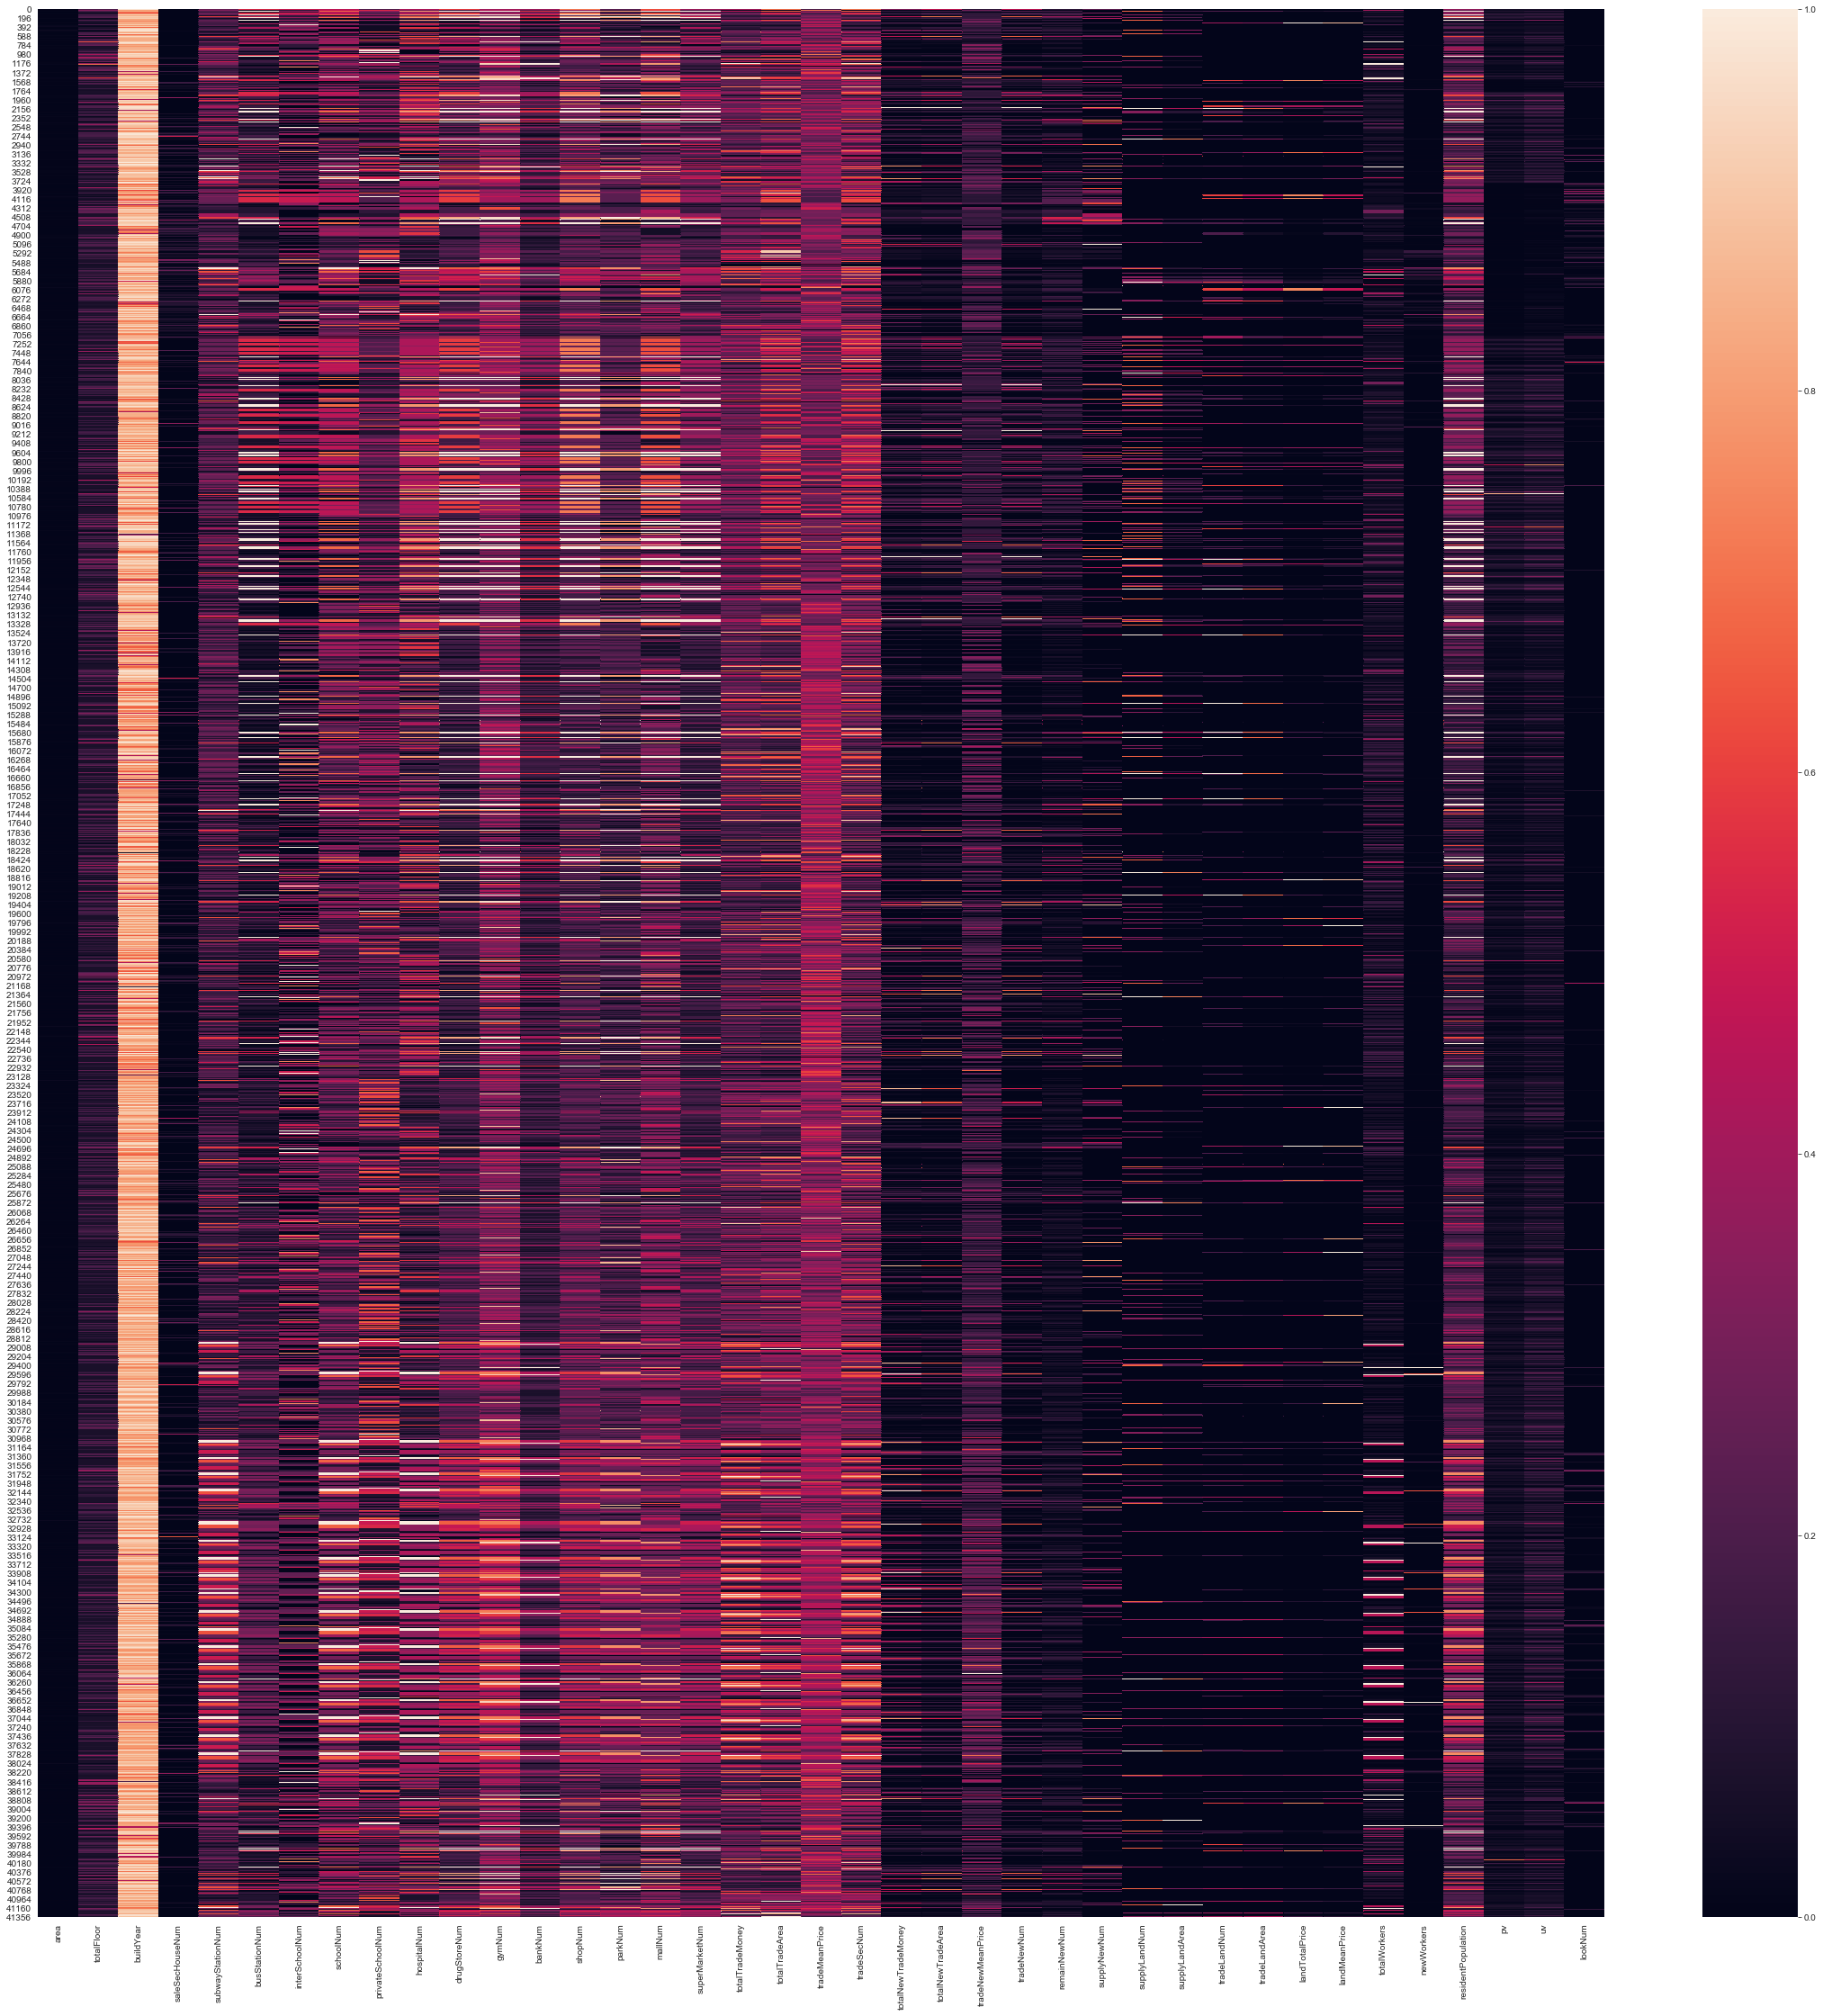

In [418]:
fig, ax = plt.subplots(figsize = (39,39))
sns.heatmap(drawData)   # 属性过多
